# Bank Deposit Prediction - Team Smart Banker (Chukwujekwu J. Ezema)

## 1.0 Get Dataset

In [1]:
# 1.1 Import and Install Libraries
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# display all columns of the dataset
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

#Confirmation
print('Libraries successfully installed')

Libraries successfully installed


In [2]:
""" Step 1: Get dataset """
# 1.2 Load dataset

# Reading the Bank Additional File - dataset for the features
bank_df = pd.read_csv('bank-additional-full.csv')

bank_df_copy = bank_df.copy() #making a copy
bank_df_copy

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."
...,...
41183,"73;""retired"";""married"";""professional.course"";""..."
41184,"46;""blue-collar"";""married"";""professional.cours..."
41185,"56;""retired"";""married"";""university.degree"";""no..."
41186,"44;""technician"";""married"";""professional.course..."


## 2.0 Exploratory Data Analysis and Feature Engineering

In [3]:
""" Step 2: Clean dataset """
# Split the columns into separate columns
data = bank_df.iloc[:,0].str.split(";", expand=True)

# Remove the double quotes from the values
data = data.applymap(lambda x: x.strip('"'))

# Rename the columns with more descriptive names
new_cols = ["age", "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "duration", "campaign", "pdays", "previous", "poutcome", "emp_var_rate", "cons_price_idx", "cons_conf_idx", "euribor3m", "nr_employed", "y"]
data = data.rename(columns=dict(zip(data.columns, new_cols)))
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
# Explore the features of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41188 non-null  object
 1   job             41188 non-null  object
 2   marital         41188 non-null  object
 3   education       41188 non-null  object
 4   default         41188 non-null  object
 5   housing         41188 non-null  object
 6   loan            41188 non-null  object
 7   contact         41188 non-null  object
 8   month           41188 non-null  object
 9   day_of_week     41188 non-null  object
 10  duration        41188 non-null  object
 11  campaign        41188 non-null  object
 12  pdays           41188 non-null  object
 13  previous        41188 non-null  object
 14  poutcome        41188 non-null  object
 15  emp_var_rate    41188 non-null  object
 16  cons_price_idx  41188 non-null  object
 17  cons_conf_idx   41188 non-null  object
 18  euribo

In [5]:
# Check features with missing value

data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [6]:
# Check duplicated records:

print("Number of duplicated records before dropping:",data.duplicated().sum())

Number of duplicated records before dropping: 12


In [7]:
# Drop duplicated records => remember to put in a new variable when executing
df1 = data.drop_duplicates(keep='last')

# Confirming non duplicated
print("Number of duplicated records after dropping: {}".format(df1.duplicated().sum()))

Number of duplicated records after dropping: 0


In [8]:
""" Step 3: Transform data """
# Convert categorical data to numeric values
def to_integers(self):

    # Converting to binary values for best results
    self.replace({'y' : {'yes' : 1,  'no' : 0}}, inplace=True)

    # Converting to numeric values
    self['age'] = pd.to_numeric(self['age'], errors='coerce')
    self['duration'] = pd.to_numeric(self['duration'], errors='coerce')
    self['campaign'] = pd.to_numeric(self['campaign'], errors='coerce')
    self['pdays'] = pd.to_numeric(self['pdays'], errors='coerce')
    self['previous'] = pd.to_numeric(self['previous'], errors='coerce')
    self['emp_var_rate'] = pd.to_numeric(self['emp_var_rate'], errors='coerce')
    self['cons_price_idx'] = pd.to_numeric(self['cons_price_idx'], errors='coerce')
    self['cons_conf_idx'] = pd.to_numeric(self['cons_conf_idx'], errors='coerce')
    self['euribor3m'] = pd.to_numeric(self['euribor3m'], errors='coerce')
    self['nr_employed'] = pd.to_numeric(self['nr_employed'], errors='coerce')

    return self

to_integers(df1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [9]:
# label encoding
def to_encoding(self):
    # marriage
    marriage = {'married' : 'Married',
                 'single': 'Not_married',
                 'divorced' : 'Not_married',
                 'unknown': 'Unknown'}

    self['marital'] = self['marital'].map(marriage)

    # job type
    job_type = {'admin.':'Employed',
                         'blue-collar':'Employed',
                         'entrepreneur':'Self_employed',
                         'retired' : 'Unemployed',
                        'self-employed' : 'Self_employed',
                        'services' : 'Employed',
                        'student' : 'Unemployed',
                        'technician' : 'Employed',
                        'unemployed' : 'Unemployed',
                        'unknown' : 'Unknown',
                         'housemaid':'Employed',
                        'management':'Unemployed'}

    self['job'] = self['job'].map(job_type)

    # education type
    education_type = {'basic.4y':'Basic',
                         'basic.6y':'Basic',
                         'basic.9y':'Basic',
                         'high.school':'Secondary',
                          'illiterate':'Uneducated',
                          'professional.course':'Tertiary',
                          'university.degree':'Tertiary',
                         'unknown':'Unknown'}

    self['education'] = self['education'].map(education_type)
    
     # day of the week
    dayOfWeek = {'mon':'Early_Weekday',
                         'tue':'Early_Weekday',
                         'wed':'Mid_Weekday',
                         'thu':'Mid_Weekday',
                          'fri':'Last_Weekday'}

    self['day_of_week'] = self['day_of_week'].map(dayOfWeek)
    
    # month
    month = {'jan':'Jan_Mar',
                         'feb':'Jan_Mar',
                         'mar':'Jan_Mar',
                         'apr' : 'Apr_Jun',
                        'may' : 'Apr_Jun',
                        'jun' : 'Apr_Jun',
                        'jul' : 'Jul_Sep',
                        'aug' : 'Jul_Sep',
                        'sep' : 'Jul_Sep',
                        'oct' : 'Oct_Dec',
                         'nov':'Oct_Dec',
                        'dec':'Oct_Dec'}

    self['month'] = self['month'].map(month)
    
    return self

to_encoding(df1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,Employed,Married,Basic,no,no,no,telephone,Apr_Jun,Early_Weekday,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,Employed,Married,Secondary,unknown,no,no,telephone,Apr_Jun,Early_Weekday,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,Employed,Married,Secondary,no,yes,no,telephone,Apr_Jun,Early_Weekday,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,Employed,Married,Basic,no,no,no,telephone,Apr_Jun,Early_Weekday,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,Employed,Married,Secondary,no,no,yes,telephone,Apr_Jun,Early_Weekday,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,Unemployed,Married,Tertiary,no,yes,no,cellular,Oct_Dec,Last_Weekday,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,Employed,Married,Tertiary,no,no,no,cellular,Oct_Dec,Last_Weekday,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,Unemployed,Married,Tertiary,no,yes,no,cellular,Oct_Dec,Last_Weekday,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,Employed,Married,Tertiary,no,no,no,cellular,Oct_Dec,Last_Weekday,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [10]:
# covert to dummy features
def hot_encoding(self):
    # Renaming long-labelled columns for better tags
    self.columns = ['Age', 'Job', 'Marital', 'Education', 'Default', 'Housing',
                    'Loan', 'Contact', 'Period', 'Weekdays', 'Duration', 
                    'Campaign', 'Pdays', 'Previous', 'Poutcome', 'Emp_var_rate', 'Cons_price_idx', 
                    'Cons_conf_idx', 'Euribor3m', 'No_employed', 'Subscribed']

    # Setting the dummy features (one-hot encoding) to enhance feature selection
    df = pd.get_dummies(self, columns=['Job', 'Marital', 'Education',"Default",
                                        'Housing','Loan','Contact','Period','Weekdays','Poutcome'])
    
    return df

df2 = hot_encoding(df1)
df2

,Age,Duration,Campaign,Pdays,Previous,Emp_var_rate,Cons_price_idx,Cons_conf_idx,Euribor3m,No_employed,Subscribed,Job_Employed,Job_Self_employed,Job_Unemployed,Job_Unknown,Marital_Married,Marital_Not_married,Marital_Unknown,Education_Basic,Education_Secondary,Education_Tertiary,Education_Uneducated,Education_Unknown,Default_no,Default_unknown,Default_yes,Housing_no,Housing_unknown,Housing_yes,Loan_no,Loan_unknown,Loan_yes,Contact_cellular,Contact_telephone,Period_Apr_Jun,Period_Jan_Mar,Period_Jul_Sep,Period_Oct_Dec,Weekdays_Early_Weekday,Weekdays_Last_Weekday,Weekdays_Mid_Weekday,Poutcome_failure,Poutcome_nonexistent,Poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0


In [11]:
# confirm the nature of the data after feature engineering

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     41176 non-null  int64  
 1   Duration                41176 non-null  int64  
 2   Campaign                41176 non-null  int64  
 3   Pdays                   41176 non-null  int64  
 4   Previous                41176 non-null  int64  
 5   Emp_var_rate            41176 non-null  float64
 6   Cons_price_idx          41176 non-null  float64
 7   Cons_conf_idx           41176 non-null  float64
 8   Euribor3m               41176 non-null  float64
 9   No_employed             41176 non-null  float64
 10  Subscribed              41176 non-null  int64  
 11  Job_Employed            41176 non-null  uint8  
 12  Job_Self_employed       41176 non-null  uint8  
 13  Job_Unemployed          41176 non-null  uint8  
 14  Job_Unknown             41176 non-null

In [12]:
# Checking statistics of the numerical features

# Define numerical columns
col_plot = ["Age","Duration","Campaign","Pdays","Previous","Emp_var_rate",
            "Cons_price_idx","Cons_conf_idx","Euribor3m","No_employed"]

df2[col_plot].describe().T # to transpose the description table

,count,mean,std,min,25%,50%,75%,max
Age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
Duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
Campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
Pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
Previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
Emp_var_rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
Cons_price_idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
Cons_conf_idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
Euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
No_employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


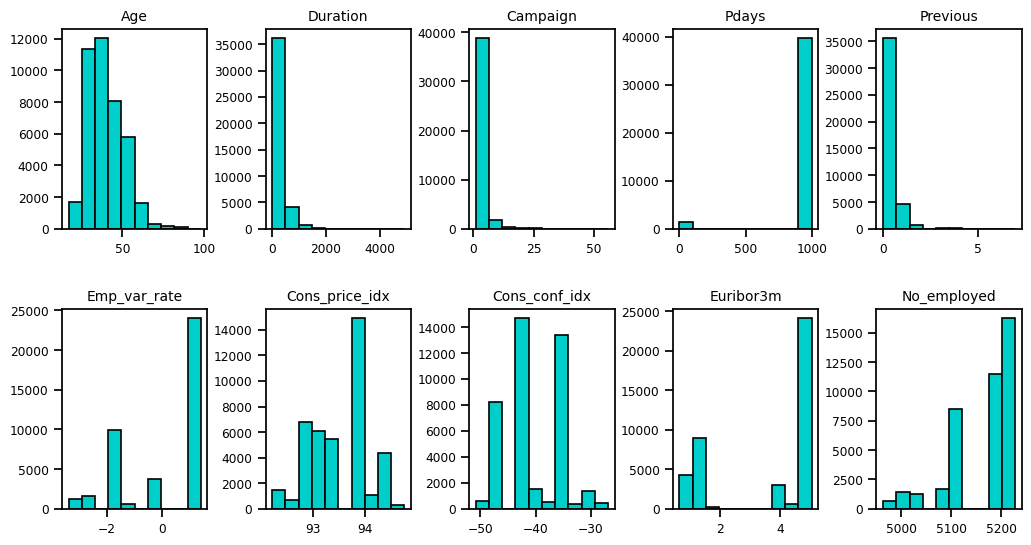

In [13]:
""" Step 4: Visualize Data """
# Data Visualization Analysis

# Customizing the seaborn chart designs
sns.set_context("notebook",font_scale=.8,rc={"grid.linewidth": 0.1,'patch.linewidth': 0.0,
    "axes.grid":True,
    "grid.linestyle": "-",
    "axes.titlesize" : 10,                                       
    "figure.autolayout":True})
                
color = '#00CECB'
palette2 = 'pastel'
palette3 = 'inferno'
palette4 = 'Set2'

# Define the number of rows and columns for the subplots
n_rows = 2
n_cols = 5

# Create the subplots with the specified number of rows and columns
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 6))

# Flatten the axs array so we can loop over it more easily
axs = axs.flatten()

# Plot each numerical distribution in a separate subplot
for i, col in enumerate(col_plot):
    axs[i].hist(df2[col], edgecolor='black', linewidth=1.2, color=color)
    axs[i].set_title(col)

# Adjust the spacing between the subplots
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)


Shape after transformation (41176, 44)
Number of Unsubscribed Class = 36537
Number of Subscribed Class = 4639
Percent of Unsubscribed Class = 88.73%
Percent of Subscribed Class = 11.27%


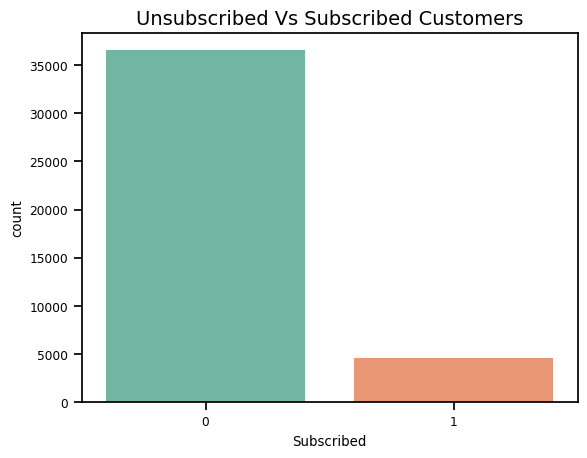

In [14]:
# Target Distribution
print("Shape after transformation", df2.shape)
print(f'Number of Unsubscribed Class = {df2["Subscribed"].value_counts()[0]}')
print(f'Number of Subscribed Class = {df2["Subscribed"].value_counts()[1]}')
print(f'Percent of Unsubscribed Class = {round(df2["Subscribed"].value_counts()[0]/len(df2) * 100,2)}%')
print(f'Percent of Subscribed Class = {round(df2["Subscribed"].value_counts()[1]/len(df2) * 100,2)}%')

sns.countplot('Subscribed', data=df2, palette="Set2")
plt.title('Unsubscribed Vs Subscribed Customers', fontsize=14)
plt.show()

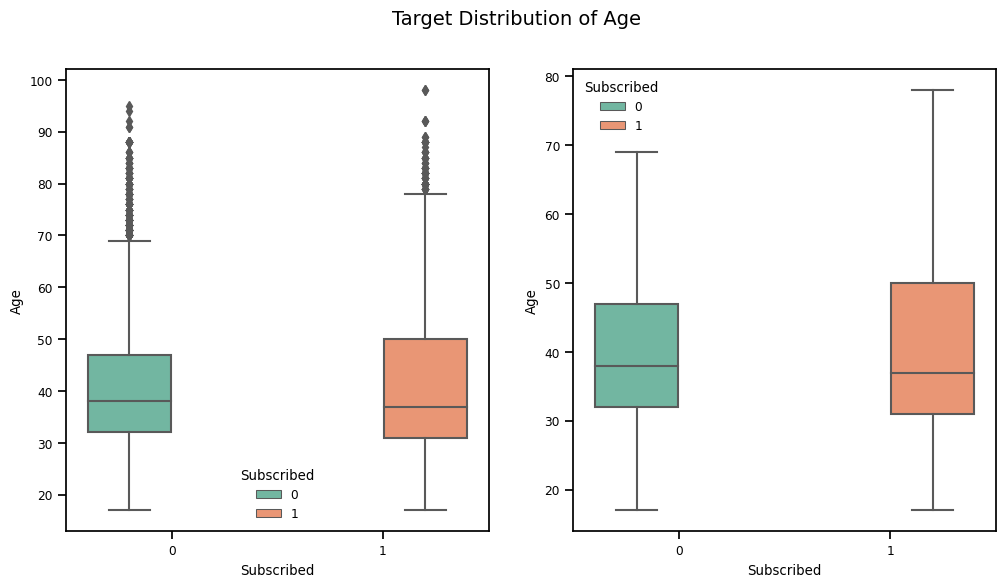

In [15]:
# visualize the outliers in respect to the target

# Age
fig, (ax1, ax2,) = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(ax = ax1, x="Subscribed", y="Age", hue="Subscribed",data=df2, palette=palette4,showfliers=True)
sns.boxplot(ax = ax2, x="Subscribed", y="Age", hue="Subscribed",data=df2, palette=palette4,showfliers=False)

plt.suptitle('Target Distribution of Age', fontsize=14)
plt.show()

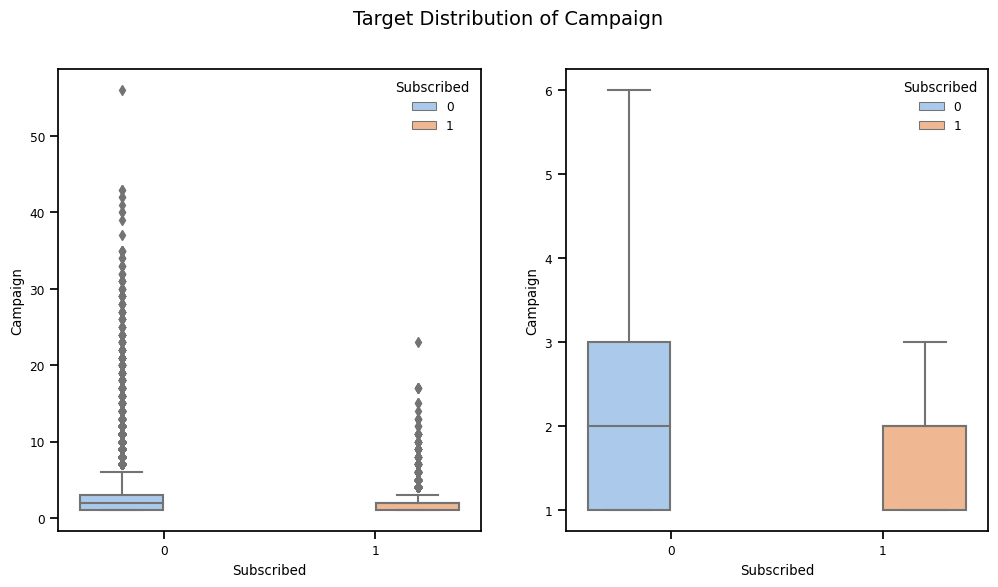

In [16]:
# Campaign
fig, (ax1, ax2,) = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(ax = ax1, x="Subscribed", y="Campaign", hue="Subscribed",data=df2, palette=palette2,showfliers=True)
sns.boxplot(ax = ax2, x="Subscribed", y="Campaign", hue="Subscribed",data=df2, palette=palette2,showfliers=False)

plt.suptitle('Target Distribution of Campaign', fontsize=14)
plt.show()

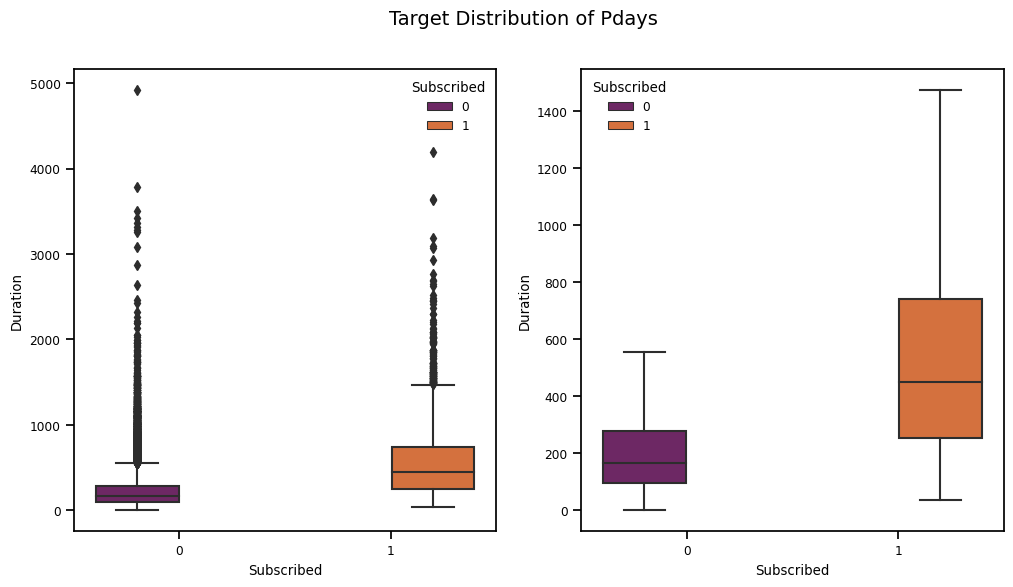

In [17]:
# Duration
fig, (ax1, ax2,) = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(ax = ax1, x="Subscribed", y="Duration", hue="Subscribed",data=df2, palette=palette3,showfliers=True)
sns.boxplot(ax = ax2, x="Subscribed", y="Duration", hue="Subscribed",data=df2, palette=palette3,showfliers=False)

plt.suptitle('Target Distribution of Pdays', fontsize=14)
plt.show()

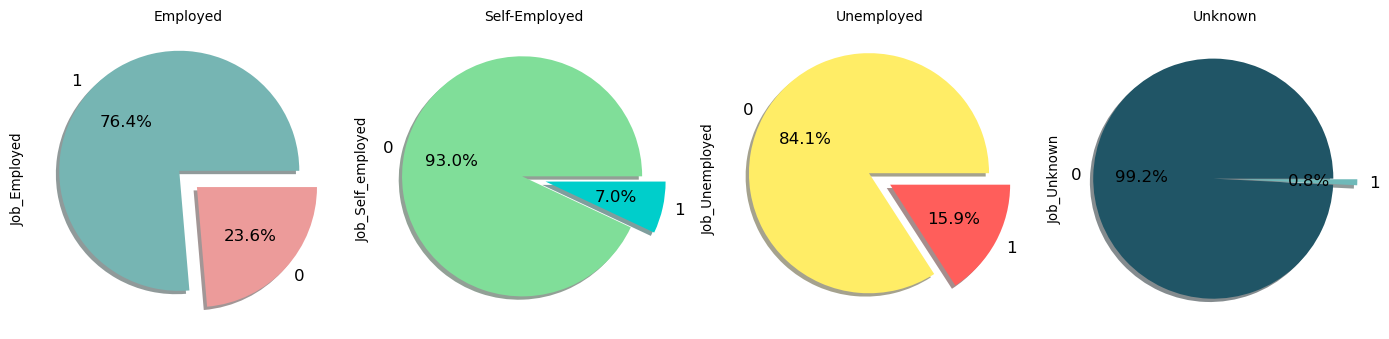

In [18]:
# binary feature distribution

# job type
fig, axes = plt.subplots(1,4)

Employed= df2['Job_Employed'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"], textprops = {'fontsize':12}, ax=axes[0])
Employed.set_title("Employed")

Self_Employed= df2['Job_Self_employed'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#80DE99","#00CECB"],textprops = {'fontsize':12}, ax=axes[1])
Self_Employed.set_title("Self-Employed")

Unemployed = df2['Job_Unemployed'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['#FFED66','#FF5E5B'],textprops = {'fontsize':12}, ax=axes[2])
Unemployed.set_title("Unemployed")

Unknown= df2['Job_Unknown'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['#205566','#6FB9B9'],textprops = {'fontsize':12}, ax=axes[3])
Unknown.set_title("Unknown")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

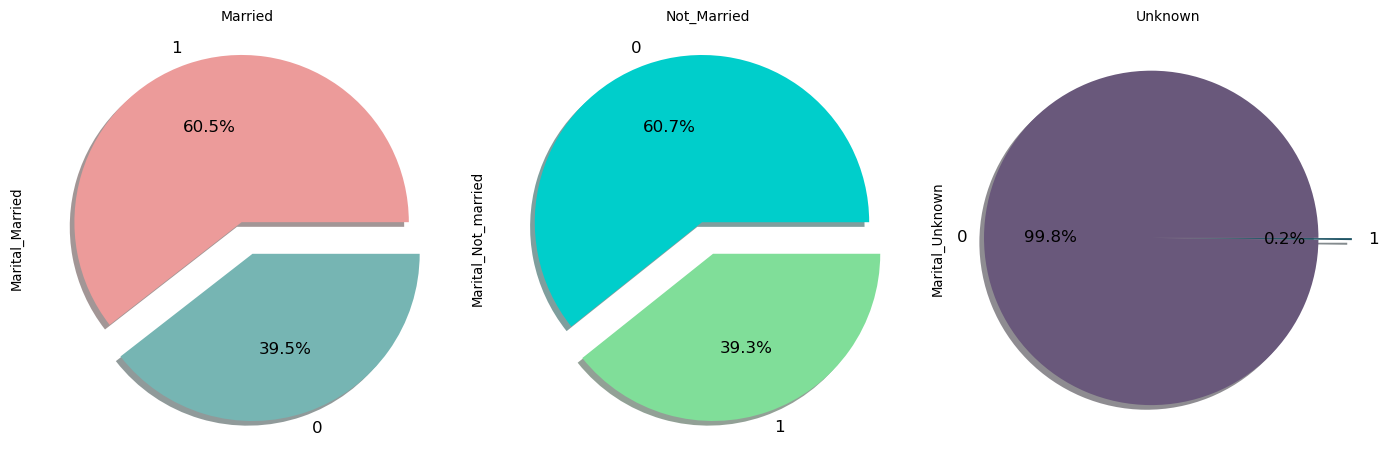

In [19]:
# marital status
fig, axes = plt.subplots(1,3)

Married= df2['Marital_Married'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#EC9B9A", "#76B5B3"], textprops = {'fontsize':12}, ax=axes[0])
Married.set_title("Married")

Not_married= df2['Marital_Not_married'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#00CECB", "#80DE99"],textprops = {'fontsize':12}, ax=axes[1])
Not_married.set_title("Not_Married")

Unknown= df2['Marital_Unknown'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['#69587B', '#205566'],textprops = {'fontsize':12}, ax=axes[2])
Unknown.set_title("Unknown")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

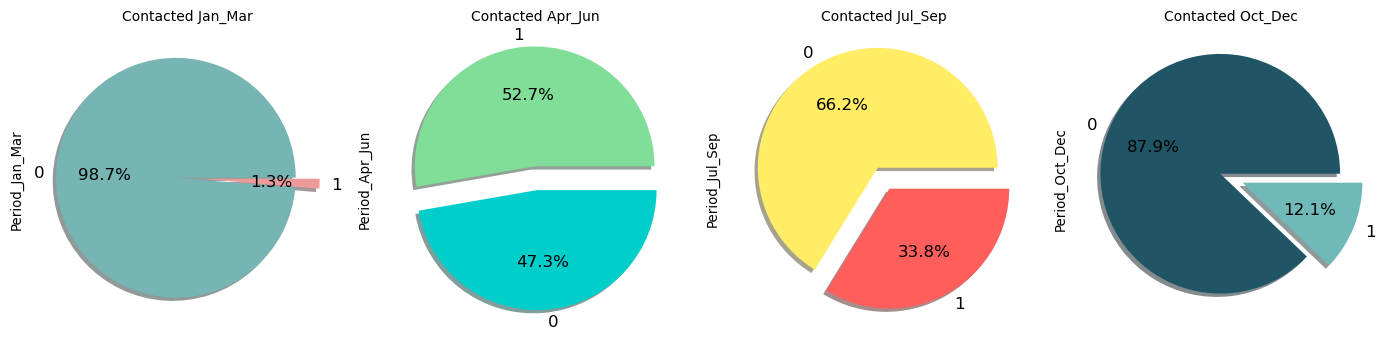

In [20]:
# period type
fig, axes = plt.subplots(1,4)

Jan_Mar = df2['Period_Jan_Mar'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"], textprops = {'fontsize':12}, ax=axes[0])
Jan_Mar.set_title("Contacted Jan_Mar")

Apr_Jun = df2['Period_Apr_Jun'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#80DE99","#00CECB"],textprops = {'fontsize':12}, ax=axes[1])
Apr_Jun.set_title("Contacted Apr_Jun")

Jul_Sep = df2['Period_Jul_Sep'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['#FFED66','#FF5E5B'],textprops = {'fontsize':12}, ax=axes[2])
Jul_Sep.set_title("Contacted Jul_Sep")

Oct_Dec = df2['Period_Oct_Dec'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['#205566','#6FB9B9'],textprops = {'fontsize':12}, ax=axes[3])
Oct_Dec.set_title("Contacted Oct_Dec")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

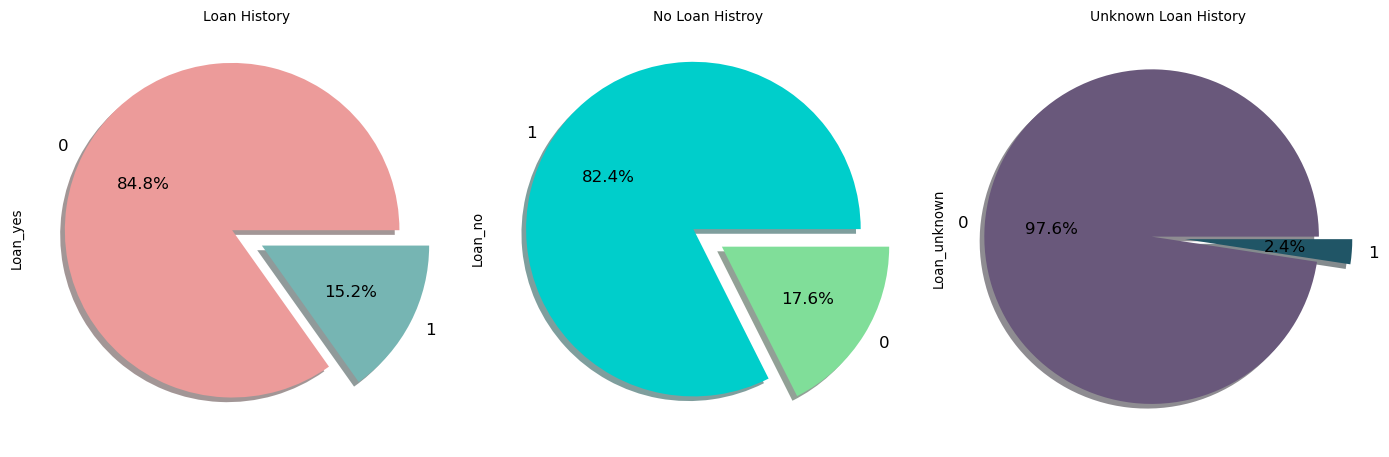

In [21]:
# loan history
fig, axes = plt.subplots(1,3)

Loan_yes= df2['Loan_yes'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#EC9B9A", "#76B5B3"], textprops = {'fontsize':12}, ax=axes[0])
Loan_yes.set_title("Loan History")

Loan_no= df2['Loan_no'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#00CECB", "#80DE99"],textprops = {'fontsize':12}, ax=axes[1])
Loan_no.set_title("No Loan Histroy")

Unknown= df2['Loan_unknown'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['#69587B', '#205566'],textprops = {'fontsize':12}, ax=axes[2])
Unknown.set_title("Unknown Loan History")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

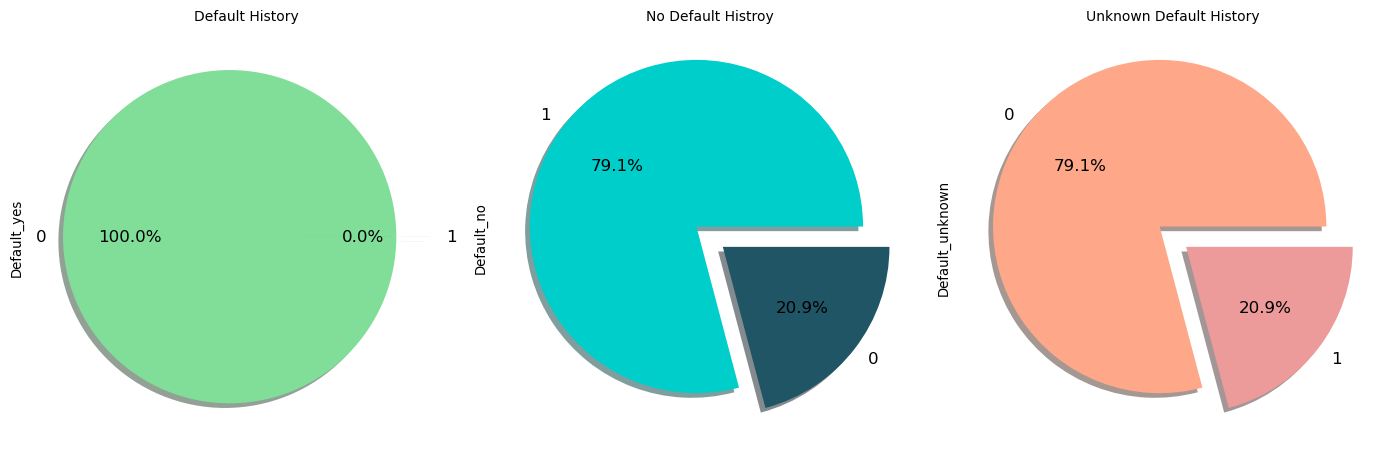

In [22]:
# default history
fig, axes = plt.subplots(1,3)

Default_yes= df2['Default_yes'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#80DE99", "#76B5B3"], textprops = {'fontsize':12}, ax=axes[0])
Default_yes.set_title("Default History")

Default_no= df2['Default_no'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#00CECB",'#205566'],textprops = {'fontsize':12}, ax=axes[1])
Default_no.set_title("No Default Histroy")

Unknown= df2['Default_unknown'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['#FEA889',"#EC9B9A"],textprops = {'fontsize':12}, ax=axes[2])
Unknown.set_title("Unknown Default History")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

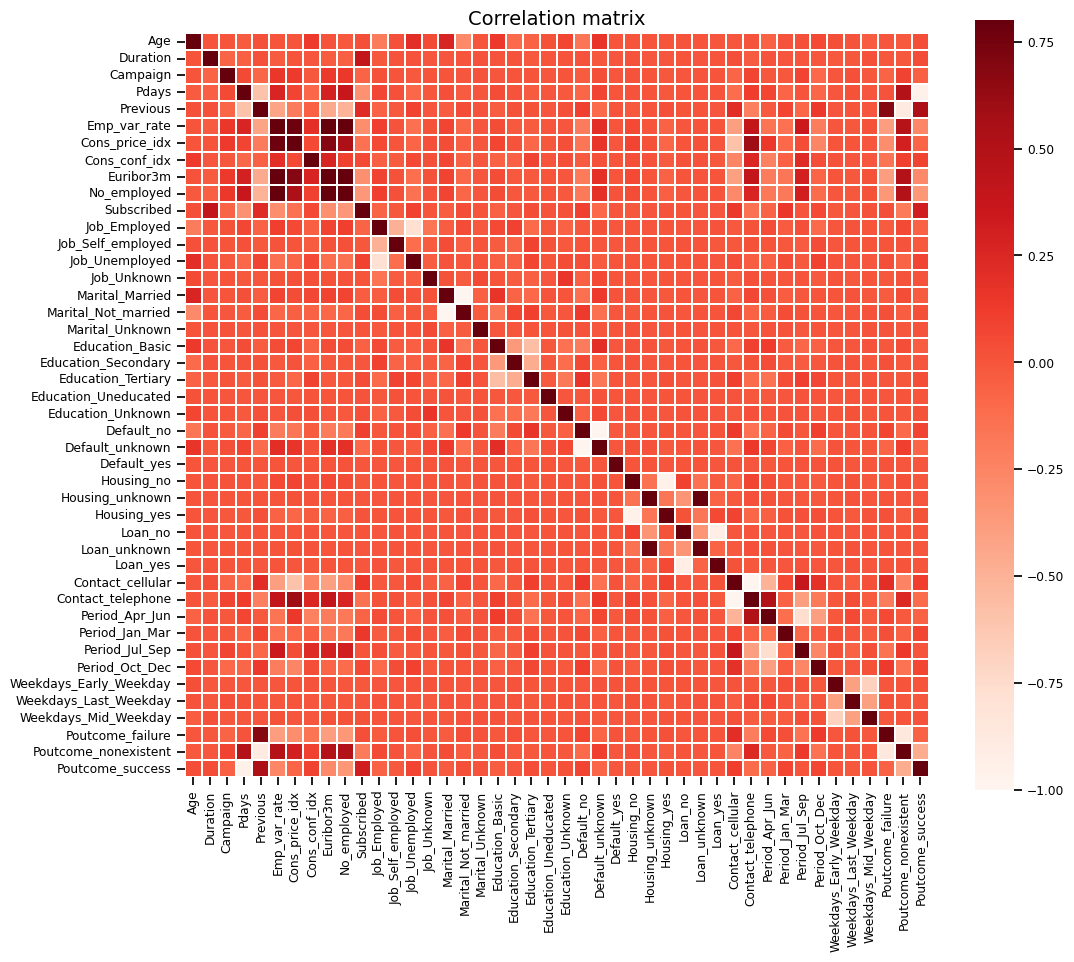

In [23]:
# Correlation Analysis
def corr_mat(self):
    colormap = plt.cm.Reds
    plt.figure(figsize=(12,10))
    sns.heatmap(self.corr(),linewidths=0.1,vmax=0.8, 
                square=True, cmap = colormap, linecolor='white')
    plt.title('Correlation matrix', fontsize=14)
    plt.show()
    
corr_mat(df2)

## 3.0 Feature Selection and Data Preparation

In [24]:
# Import Libraries
import time
import plotly.express as px
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler  # to avoid the outliner effect

import warnings
warnings.filterwarnings('ignore')

In [25]:
""" Step 5: Prepare and select best features for the training"""
# Scale the numeric columns using StandardScaler

# copy of datasets
df3 = df2.copy()
for i in col_plot:
    
    # fit on training data column
    scale = StandardScaler().fit(df3[[i]])
    
    # transform the training data column
    df3[i] = scale.transform(df3[[i]])
    
df3

,Age,Duration,Campaign,Pdays,Previous,Emp_var_rate,Cons_price_idx,Cons_conf_idx,Euribor3m,No_employed,Subscribed,Job_Employed,Job_Self_employed,Job_Unemployed,Job_Unknown,Marital_Married,Marital_Not_married,Marital_Unknown,Education_Basic,Education_Secondary,Education_Tertiary,Education_Uneducated,Education_Unknown,Default_no,Default_unknown,Default_yes,Housing_no,Housing_unknown,Housing_yes,Loan_no,Loan_unknown,Loan_yes,Contact_cellular,Contact_telephone,Period_Apr_Jun,Period_Jan_Mar,Period_Jul_Sep,Period_Oct_Dec,Weekdays_Early_Weekday,Weekdays_Last_Weekday,Weekdays_Mid_Weekday,Poutcome_failure,Poutcome_nonexistent,Poutcome_success
0,1.533143,0.010352,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
1,1.629107,-0.421577,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
2,-0.290177,-0.124626,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3,-0.002284,-0.413864,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
4,1.533143,0.187751,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164534,0.291876,-0.565963,0.195443,-0.349551,-0.752402,2.058076,-2.225059,-1.495197,-2.815689,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
41184,0.573501,0.480845,-0.565963,0.195443,-0.349551,-0.752402,2.058076,-2.225059,-1.495197,-2.815689,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
41185,1.533143,-0.267317,-0.204990,0.195443,-0.349551,-0.752402,2.058076,-2.225059,-1.495197,-2.815689,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
41186,0.381573,0.708379,-0.565963,0.195443,-0.349551,-0.752402,2.058076,-2.225059,-1.495197,-2.815689,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0


In [26]:
# Feature Variable (X) and Target Variable (y) 

X = df3.drop('Subscribed', axis=1) # select all columns except 'Subscribed'
y = df3['Subscribed'] # select only the 'Subscribed' column

In [27]:
# create a PCA object with n_components
pca = PCA(n_components=15)

# fit and transform the scaled data
pca_features = pca.fit_transform(X)

# get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# print the explained variance ratios
print(explained_variance_ratios)

[0.2810752  0.09795517 0.07867949 0.07210249 0.06661668 0.06147875
 0.05321694 0.03283602 0.03164107 0.03019133 0.02757622 0.02451131
 0.01959075 0.0190085  0.01799327]


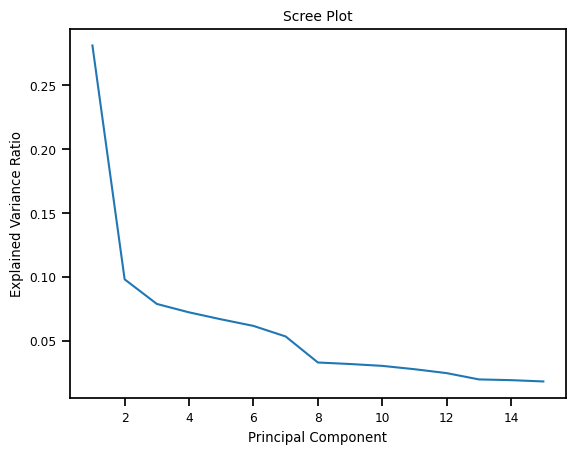

In [28]:
plt.plot(range(1, len(explained_variance_ratios)+1), explained_variance_ratios)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

Index(['Duration', 'Pdays', 'Previous', 'Emp_var_rate', 'Cons_price_idx',
       'Euribor3m', 'No_employed', 'Job_Self_employed', 'Education_Unknown',
       'Default_no', 'Loan_yes', 'Contact_cellular', 'Period_Apr_Jun',
       'Poutcome_failure', 'Poutcome_nonexistent'],
      dtype='object')


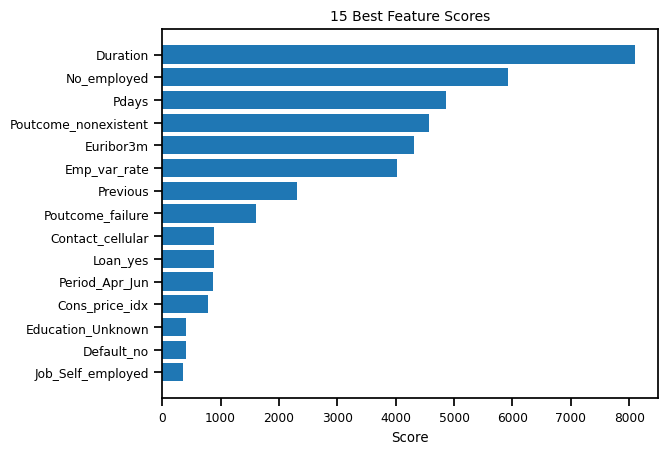

In [29]:
# create a SelectKBest object with k features
kbest = SelectKBest(f_classif, k=15)

# fit and transform the scaled data
kbest_features = kbest.fit_transform(X, y)

# get the indices of the selected features
selected_features_indices = kbest.get_support(indices=True)

# get the names of the selected features
selected_features = df3.columns[selected_features_indices]

# print the selected features
print(selected_features)

# create a bar chart of feature scores in ascending order
fig, ax = plt.subplots()
sorted_indices = np.argsort(kbest.scores_[selected_features_indices])
sorted_features = selected_features[sorted_indices]
sorted_scores = kbest.scores_[selected_features_indices][sorted_indices]
ax.barh(sorted_features, sorted_scores)
ax.set_xlabel('Score')
ax.set_title('15 Best Feature Scores')
plt.show()

In [30]:
# Get sample data
# To reduce training time, resample data
n_sample = 15000
random_state = 42

non_subscribed = df3[df3['Subscribed'] == 0].sample(n_sample, random_state=random_state) #resample only from the majority class
subscribed =  df3[df3['Subscribed'] == 1]

# Merge 2 subset
sample = non_subscribed.append(subscribed).sample(frac=1, random_state=random_state).reset_index(drop=True)
sample_y = sample["Subscribed"].values

print("After resampling, Number of Default Instances : {}".format(sum(sample_y==1)))
print("After resampling, Number of Non-Default Instances : {}".format(sum(sample_y==0)))

sample

After resampling, Number of Default Instances : 4639
After resampling, Number of Non-Default Instances : 15000


,Age,Duration,Campaign,Pdays,Previous,Emp_var_rate,Cons_price_idx,Cons_conf_idx,Euribor3m,No_employed,Subscribed,Job_Employed,Job_Self_employed,Job_Unemployed,Job_Unknown,Marital_Married,Marital_Not_married,Marital_Unknown,Education_Basic,Education_Secondary,Education_Tertiary,Education_Uneducated,Education_Unknown,Default_no,Default_unknown,Default_yes,Housing_no,Housing_unknown,Housing_yes,Loan_no,Loan_unknown,Loan_yes,Contact_cellular,Contact_telephone,Period_Apr_Jun,Period_Jan_Mar,Period_Jul_Sep,Period_Oct_Dec,Weekdays_Early_Weekday,Weekdays_Last_Weekday,Weekdays_Mid_Weekday,Poutcome_failure,Poutcome_nonexistent,Poutcome_success
0,0.381573,-0.853505,0.155984,0.195443,-0.349551,0.839079,1.536336,-0.280292,0.770695,0.845186,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0
1,-1.249818,-0.302025,-0.565963,-5.132617,5.711564,-1.134358,0.779639,0.476006,-1.568997,-2.428148,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1
2,0.477537,-0.745523,0.516958,0.195443,-0.349551,0.839079,-0.227562,0.951394,0.773002,0.845186,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
3,-0.578069,-0.201756,-0.565963,-5.116568,3.691192,-0.752402,2.058076,-2.225059,-1.484819,-2.815689,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1
4,-0.865962,-0.683819,-0.565963,-5.132617,1.670821,-1.898269,-2.374990,1.966994,-1.609933,-1.257222,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19634,1.725072,-0.884357,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.713616,0.331695,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0
19635,2.972606,-0.552698,0.155984,0.195443,-0.349551,-1.134358,1.104431,0.043836,-1.578222,-2.428148,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
19636,1.629107,-0.760949,0.516958,0.195443,-0.349551,0.839079,-0.227562,0.951394,0.774731,0.845186,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0
19637,0.285609,-0.479425,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0


In [31]:
# Map out the 15 best selected features from the sample data

# create a new dataframe from the sample with only the best features
df_best = sample.loc[:, selected_features]

# display the new X dataframe
df_best.head()


,Duration,Pdays,Previous,Emp_var_rate,Cons_price_idx,Euribor3m,No_employed,Job_Self_employed,Education_Unknown,Default_no,Loan_yes,Contact_cellular,Period_Apr_Jun,Poutcome_failure,Poutcome_nonexistent
0,-0.853505,0.195443,-0.349551,0.839079,1.536336,0.770695,0.845186,0,0,1,1,0,1,0,1
1,-0.302025,-5.132617,5.711564,-1.134358,0.779639,-1.568997,-2.428148,0,0,1,0,1,0,0,0
2,-0.745523,0.195443,-0.349551,0.839079,-0.227562,0.773002,0.845186,0,0,1,1,1,0,0,1
3,-0.201756,-5.116568,3.691192,-0.752402,2.058076,-1.484819,-2.815689,0,1,1,0,1,0,0,0
4,-0.683819,-5.132617,1.670821,-1.898269,-2.374990,-1.609933,-1.257222,0,0,1,0,1,0,0,0


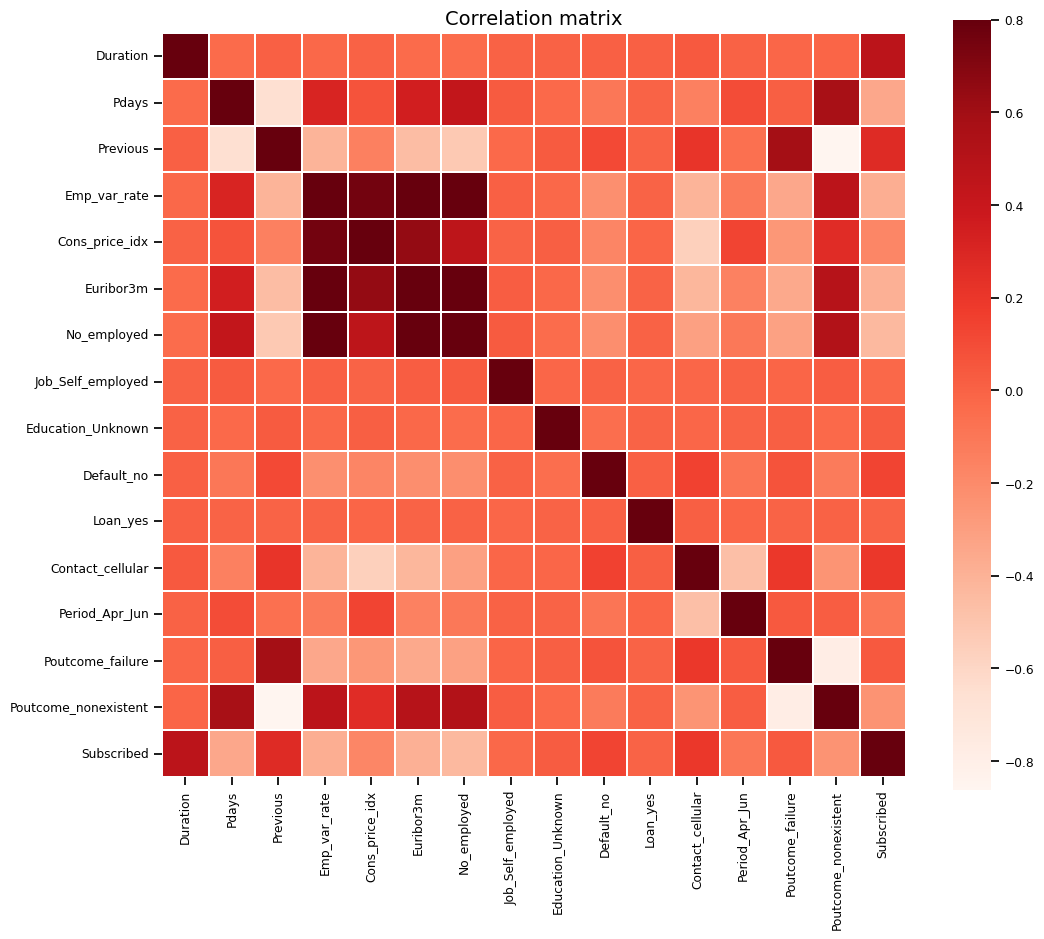

In [32]:
# Correlation Analysis of the Best Features

# Append the target variable to the new best dataframe
df_best['Subscribed'] = sample['Subscribed']
 
# Correlation plot
corr_mat(df_best)

In [37]:
# Train_Test Split samples for best feature dataset
best_X = df_best.drop('Subscribed', axis=1) # select all columns except 'Subscribed'
best_y = df_best['Subscribed'] # select only the 'Subscribed' column

X_train, X_test, y_train, y_test = train_test_split(best_X, best_y, test_size=0.2, random_state=random_state, shuffle=True, stratify=best_y)

# Train_Test Split samples for pca dataset from the sample data
sample_X = sample.drop('Subscribed', axis=1) 
sample_y = sample['Subscribed'] 

X_train_main, X_test_main, y_train, y_test = train_test_split(sample_X, sample_y, test_size=0.2, random_state=random_state, shuffle=True, stratify=sample_y)

print(f"For the resampled best feature data of {n_sample} non-subscribed instances:")
print("Shape of X_train dataset: ", X_train.shape)
print("Size of y_train dataset: ", y_train.shape[0])
print("Shape of X_test dataset: ", X_test.shape)
print("Size of y_test dataset: ", y_test.shape[0])
print("----------------------------------------------------")
print("Number of Subscribed Instances in train set : {}".format(sum(y_train==1)))
print("Number of Non-Subscribed Instances in train set : {}".format(sum(y_train==0)))
print("Number of Subscribed Instances in test set : {}".format(sum(y_test==1)))
print("Number of Non-Subscribed Instances in test set : {}".format(sum(y_test==0)))
print("----------------------------------------------------")
print(f"For the resampled main feature data of {n_sample} non-subscribed instances:")
print("Shape of X_train dataset: ", X_train_main.shape)
print("Size of y_train dataset: ", y_train.shape[0])
print("Shape of X_test dataset: ", X_test_main.shape)
print("Size of y_test dataset: ", y_test.shape[0])

For the resample data of 15000 non-subscribed instances:
Shape of X_train dataset:  (15711, 15)
Size of y_train dataset:  15711
Shape of X_test dataset:  (3928, 15)
Size of y_test dataset:  3928
----------------------------------------------------
Number of Subscribed Instances in train set : 3711
Number of Non-Subscribed Instances in train set : 12000
Number of Subscribed Instances in test set : 928
Number of Non-Subscribed Instances in test set : 3000


In [38]:
# Train_Test Split samples for SMOTE oversampling
# Using SMOTE as oversampling Technique for handling imbalanced dataset

sm = SMOTE(sampling_strategy='minority', random_state=random_state)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print('The number of target class before oversampling: {}'.format(y_train.shape[0]))
print('The number of target class after oversampling: {}'.format(y_train_sm.shape[0]))
print("----------------------------------------------------")
print("\nAfter OverSampling, counts of Subscribed: {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of Non-Subscribed: {}".format(sum(y_train_sm==0)))

The number of target class before oversampling: 15711
The number of target class after oversampling: 24000
----------------------------------------------------

After OverSampling, counts of Subscribed: 12000
After OverSampling, counts of Non-Subscribed: 12000


In [39]:
# Dimentionality reduction stratgey for feature selection
def apply_PCA(X_train_main, X_test_main, COMPONENTS=10):

    # Tranform X train, X test
    pca = PCA(n_components=COMPONENTS, random_state=random_state).fit(X_train_main)
    X_train_pca = pca.transform(X_train_main)
    X_test_pca = pca.transform(X_test_main)
    print("X_train_pca.shape: {}".format(X_train_pca.shape))

    return [X_train_pca, X_test_pca]

## 4.0 Modelling

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import tensorflow as tf 
from tensorflow import keras

from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score,plot_confusion_matrix,plot_roc_curve,roc_curve

import warnings
warnings.filterwarnings('ignore')

In [41]:
""" Step 6: Model the Algorithms for Prediction"""

# Design ML model - Set up

# Classifiers
classifiers = {
            "LogisiticRegression": LogisticRegression(random_state=random_state),
            "KNearest": KNeighborsClassifier(),
            "GradientBoost": GradientBoostingClassifier(random_state=random_state),
            "Random Forest Classifier": RandomForestClassifier(random_state=random_state),
            "XGBClassifier": XGBClassifier(random_state=random_state)
}

In [42]:
# Cross Validation - Set up

# For reference, before applying Gridsearch CV to find best parameter
def cross_validate(X_train, y_train, cv=5):
    for key, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        training_score = cross_val_score(classifier, X_train, y_train, cv=cv)
        print("Classifiers: ", classifier.__class__.__name__, 
              "has a training accuracy score of", round(training_score.mean(),2) * 100, "%")

In [43]:
# Best Parameter - Set up

# Use GridSearchCV to find the best parameters suitable for each model:
def model_best_estimator(X_train, y_train, class_weight=None, random_state=random_state, cv=5):
    
    # Logistic Regression 
    t0 = time.time()
    LR_params_grid = {"solver": ["liblinear", "sag", "lbfgs"], "penalty":['l2'],
                       'C': [0.01, 0.1, 1, 100]}

    grid_LR = GridSearchCV(LogisticRegression(random_state=random_state, class_weight=class_weight, max_iter=10000),
                                LR_params_grid, cv=cv, n_jobs=4)
    grid_LR.fit(X_train, y_train)

    # get the logistic regression with the best parameters.
    LR = grid_LR.best_estimator_
    t1 = time.time()

    print("Best fit parameter for Logistic Regression", LR)
    print("Elapsed time {:.2f} s".format(t1 - t0))

    # KNN
    t2 = time.time()
    KNN_params_grid = {"n_neighbors": list(range(2,8,1)), 
                          "metric": ('minkowski', 'euclidean', 'manhattan')}
    
    grid_KNN = GridSearchCV(KNeighborsClassifier(), KNN_params_grid, cv=cv)
    grid_KNN.fit(X_train, y_train)
   
    # KNN best estimator
    KNN = grid_KNN.best_estimator_
    t3 = time.time()
    print("\nBest fit parameter for KNN", KNN)
    print("Effective metric:", KNN.effective_metric_)
    print("Elapsed time {:.2f} s".format(t3 - t2))
    
    
    # GradientBoost Classifier:
    t4 = time.time()
    GB_params_grid = {"max_depth": list(range(2,6,1)),
                "min_samples_leaf": list(range(2,7,1))}
    
    grid_GB = GridSearchCV(GradientBoostingClassifier(random_state=random_state),
                             GB_params_grid, cv=cv)
    grid_GB.fit(X_train, y_train)
    
    # gboost best estimator
    GB = grid_GB.best_estimator_
    t5 = time.time()
    
    print("\nBest fit parameter for Gradient Boost:", GB)
    print("Elapsed time {:.2f} s".format(t5 - t4))

    # Random Forest Classifier
    t6 = time.time()
    RF_params_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,6,1)),
                "min_samples_leaf": list(range(2,7,1))}

    grid_RF = GridSearchCV(RandomForestClassifier(random_state=random_state, class_weight=class_weight), 
                           RF_params_grid, cv=cv)
    grid_RF.fit(X_train, y_train)

    # random forest best estimator
    RF = grid_RF.best_estimator_
    t7 = time.time()

    print("\nBest fit parameter for Random Forest:", RF)
    print("Elapsed time {:.2f} s".format(t7 - t6))
    
    # XGBoost Classifier
    t8 = time.time()
    XGB_params_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,6,1)),
                "min_samples_leaf": list(range(2,7,1))}

    grid_XGB = GridSearchCV(XGBClassifier(random_state=random_state, class_weight=class_weight), 
                           XGB_params_grid, cv=cv)
    grid_XGB.fit(X_train, y_train)

    # random forest best estimator
    XGB = grid_XGB.best_estimator_
    t9 = time.time()

    print("\nBest fit parameter for XGBoost:", XGB)
    print("Elapsed time {:.2f} s".format(t9 - t8))
    
    return [LR, KNN, GB, RF, XGB]   

In [44]:
#Evaluate model by using cross validation - setup

def evaluate_model(classifier, X_train, y_train, cv=5):
    classifier.fit(X_train, y_train)
    score = cross_val_score(classifier, X_train, y_train, cv=cv)
    return score

In [45]:
#Get training model results - setup

def train_model(classifier, X_train, y_train, cv=5):
    y_train_pred = cross_val_predict(classifier, X_train, y_train, cv=cv)
    print(classification_report(y_train, y_train_pred, labels=[1,0])) 

In [46]:
#Get testing model results - setup

def predict_model(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    print(classification_report(y_test, y_pred, labels=[1,0]))
    
    # Confusion Matrix
    print('Confusion matrix:', classifier)
    cf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
    ax =sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Subscribed', 'Not Subscribed'],
                yticklabels=['Subscribed', 'Not Subscribed'])
    ax.set(xlabel="Predicted outputs", ylabel = "Actual outputs")
    plt.show()

In [47]:
#Plot ROC - setup

def plot_result(LR, KNN, GB, RF, XGB, X_train, y_train, cv=5):
    # Get probability of y train predict:
    LR_pred = cross_val_predict(LR, X_train, y_train, cv=cv,
                             method="decision_function")
    KNN_pred = cross_val_predict(KNN, X_train, y_train, 
                                method='predict_proba', cv=cv)[:,1]
    GB_pred = cross_val_predict(GB, X_train, y_train, 
                                method='predict_proba', cv=cv)[:,1]
    RF_pred = cross_val_predict(RF, X_train, y_train, 
                                method='predict_proba', cv=cv)[:,1]
    XGB_pred = cross_val_predict(XGB, X_train, y_train, 
                                method='predict_proba', cv=cv)[:,1]
    
    # calculate fpr and tpr and threshold
    LR_fpr, LR_tpr, LR_thresold = roc_curve(y_train, LR_pred, pos_label=1)
    KNN_fpr, KNN_tpr, KNN_threshold = roc_curve(y_train, KNN_pred, pos_label=1)
    GB_fpr, GB_tpr, GB_threshold = roc_curve(y_train, GB_pred, pos_label=1)
    RF_fpr, RF_tpr, RF_threshold = roc_curve(y_train, RF_pred, pos_label=1)
    XGB_fpr, XGB_tpr, XGB_threshold = roc_curve(y_train, XGB_pred, pos_label=1)

    # Plot ROC
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
    
    ax2.plot(LR_fpr, LR_tpr, 
             label='Logistic Regression Classifier Score: {:.3f}'.format(roc_auc_score(y_train, LR_pred, labels=[1,0])))
    ax2.plot(KNN_fpr, KNN_tpr, 
             label='KNears Neighbors Classifier Score: {:.3f}'.format(roc_auc_score(y_train, KNN_pred, labels=[1,0])))
    ax2.plot(GB_fpr, GB_tpr, 
             label='Gradient Boost Classifier Score: {:.3f}'.format(roc_auc_score(y_train, GB_pred, labels=[1,0])))
    ax2.plot(RF_fpr, RF_tpr, 
             label='Random Forest Classifier Score: {:.3f}'.format(roc_auc_score(y_train, RF_pred, labels=[1,0])))
    ax2.plot(XGB_fpr, XGB_tpr, 
             label='XGBoost Classifier Score: {:.3f}'.format(roc_auc_score(y_train, XGB_pred, labels=[1,0])))
    ax2.plot([0, 1], [0, 1], 'k--')
    #ax2.axis([-0.01, 1, 0, 1])
    ax2.set_xlabel('False Positive Rate', fontsize=16)
    ax2.set_ylabel('True Positive Rate', fontsize=16)
    ax2.set_title('ROC Curve', fontsize=18)
    ax2.legend(loc = 'best')
    
     # calc precision, recall and thresholds
    LR_precision, LR_recall, LR_thres_pr = precision_recall_curve(y_train, LR_pred, pos_label=1)
    KNN_precision, KNN_recall, KNN_thres_pr = precision_recall_curve(y_train, KNN_pred,  pos_label=1)
    GB_precision, GB_recall, GB_thres_pr = precision_recall_curve(y_train, GB_pred,  pos_label=1)
    RF_precision, RF_recall, RF_thres_pr = precision_recall_curve(y_train, RF_pred, pos_label=1)
    XGB_precision, XGB_recall, XGB_thres_pr = precision_recall_curve(y_train, XGB_pred, pos_label=1)
    
    # Plot precision-recall curve
    ax1.plot(LR_precision, LR_recall, 
             label="Logistic Regression Classifier avg precision: {:0.3f}".format(average_precision_score(y_train, LR_pred)))
    ax1.plot(KNN_precision, KNN_recall, 
             label='KNears Neighbors Classifier avg precision: {:.3f}'.format(average_precision_score(y_train, KNN_pred)))
    ax1.plot(GB_precision, GB_recall, 
             label='Gradient Boost Classifier avg precision: {:.3f}'.format(average_precision_score(y_train, GB_pred)))
    ax1.plot(RF_precision, RF_recall, 
             label='Random Forest Classifier avg precision: {:.3f}'.format(average_precision_score(y_train, RF_pred)))
    ax1.plot(XGB_precision, XGB_recall, 
             label='XGBoost Classifier avg precision: {:.3f}'.format(average_precision_score(y_train, XGB_pred)))
    ax1.set_xlabel('Precision', fontsize = 16)
    ax1.set_ylabel('Recall', fontsize = 16)
    #ax1.axis([-0.01, 1, 0, 1])
    ax1.set_title('Precision-Recall Curve', fontsize = 18)
    ax1.legend(loc = 'best')
   
    plt.show()

In [48]:
# Set up function for training and testing flow
# Start by finding the best parameter for ML model, train and get result + visualize the results

def train_test(X_train, y_train, X_test, y_test, random_state=random_state, class_weight=None, cv=5):
    
    # Find best parameter for model
    model_select_result = model_best_estimator(X_train, y_train, class_weight=class_weight)
    
    LR, KNN, GB, RF, XGB = model_select_result
    
    
    # Train and get result
    for classifier in model_select_result:
        print("\nPredict model:", classifier)
        evaluate_model(classifier, X_train, y_train, cv=cv)
        print("\nTraining result:")
        train_model(classifier, X_train, y_train, cv=cv)
        print("Testing result:")
        predict_model(classifier, X_test, y_test)
        
    
    # Plot result (ROC, Precision)
    print('Plot for training results')
    plot_result(LR, KNN, GB, RF, XGB, X_train, y_train)
    print('Plot for test results')
    plot_result(LR, KNN, GB, RF, XGB, X_test, y_test)
    
    #can add feature importance
    
    return [LR, KNN, GB, RF, XGB]

In [57]:
# Setup for Deep Learning Model
def ANN_model(X_train, y_train, X_test, y_test, epochs=5):
    
    #design model
    model = keras.Sequential([
        keras.layers.Dense(18, input_shape=(15,), activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    #compile model
    model.compile(optimizer = 'adam',
                 loss = 'binary_crossentropy',
                 metrics =['accuracy'])
    
    #fit model
    model.fit(X_train, y_train, epochs=epochs)
    
    # evaluate model
    print(f'model evaluation :', model.evaluate(X_test, y_test))
    
    # build prediction series
    yp = model.predict(X_test)
    y_pred =[]
    for element in yp:
        if element > 0.5:
            y_pred.append(1)
        else: 
            y_pred.append(0)
            
    mse = np.mean(np.power(X_test - yp, 2), axis=1)
    error = pd.DataFrame({'reconstruction_error': mse,
                            'true_class': y_test})   
    
    print(error.describe())
            
    #result
    print(classification_report(y_test, y_pred, labels=[1,0]))
    
    # Confusion Matrix
    print('Confusion matrix:', model)
    cf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
    ax =sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Subscribed', 'Not Subscribed'],
                yticklabels=['Subscribed', 'Not Subscribed'])
    ax.set(xlabel="Predicted outputs", ylabel = "Actual outputs")
    plt.show()

    # Plot ROC
    fpr, tpr, thres_roc = roc_curve(error.true_class, error.reconstruction_error)
    roc_auc = roc_auc_score(error.true_class, error.reconstruction_error, labels=[1,0])

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.001, 1])
    plt.ylim([0, 1.001])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    # Plot Precision and recall
    precision, recall, thres_pr = precision_recall_curve(error.true_class, error.reconstruction_error,  pos_label=1)
    plt.plot(precision, recall, label= 'Avg precision = {:0.3f}'.format(average_precision_score(error.true_class, error.reconstruction_error)))
    plt.title('Precision-Recall Curve')
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.show()